In [73]:
import torch
import torchvision
x = torch.zeros(3, 2)
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [74]:

### Read flattened, processed data
import pandas as pd
fash_mnist = pd.read_csv("fashion_mnist_train.csv")

## Train-test split
from sklearn.model_selection import train_test_split
train_fash, test_fash = train_test_split(fash_mnist, test_size=0.1, random_state=5)

### Separate the label column (outcome)
train_y = train_fash['y']
train_X = train_fash.drop(['y'], axis=1)
test_y = test_fash['y']
test_X = test_fash.drop(['y'], axis=1)

### Convert to numpy array then reshape to 900 by 28 by 28
mnist_unflattened = train_X.to_numpy()
mnist_unflattened = mnist_unflattened.reshape(900,28,28)

## Convert to tensor
mnist_tensor = torch.from_numpy(mnist_unflattened)

## Check shape of the first image
print(mnist_tensor[0,:,:].shape)

torch.Size([28, 28])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


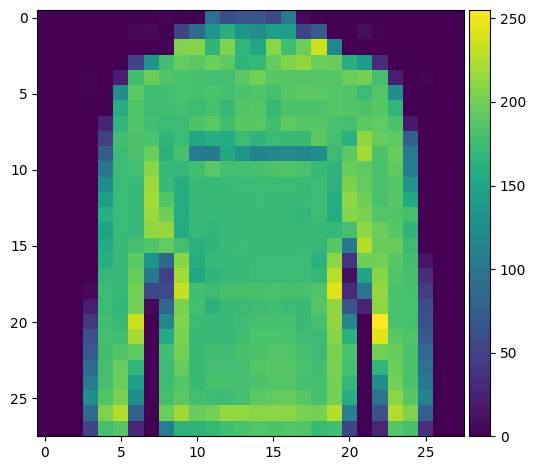

In [75]:
from skimage import io
io.imshow(mnist_unflattened[8,:,:])

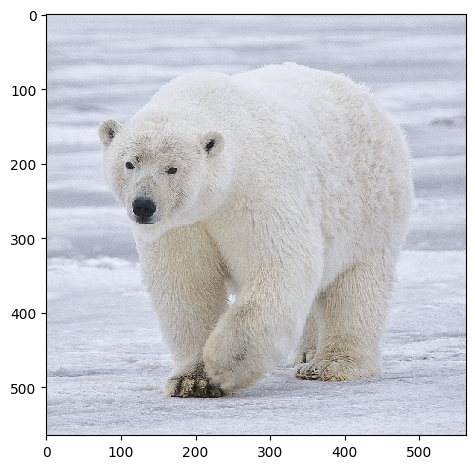

(565, 563, 3)

In [76]:
## Load an image and display it
my_img = io.imread("Polar_Bear_-_Alaska_(cropped).jpg")
io.imshow(my_img)
io.show()

## Check the shape
my_img.shape

In [77]:
## Convert to tensor and check the shape
polar_bear = torch.from_numpy(my_img)
print(polar_bear.shape)

## Move third dimension (color channels) to the first dimension
polar_bear2 = torch.movedim(polar_bear, source=2, destination=0)
print(polar_bear2.shape)

## Add an empty first dimension, putting our tensor into the standard format
polar_bear_final = torch.unsqueeze(polar_bear2, dim=0)
print(polar_bear_final.shape)

torch.Size([565, 563, 3])
torch.Size([3, 565, 563])
torch.Size([1, 3, 565, 563])


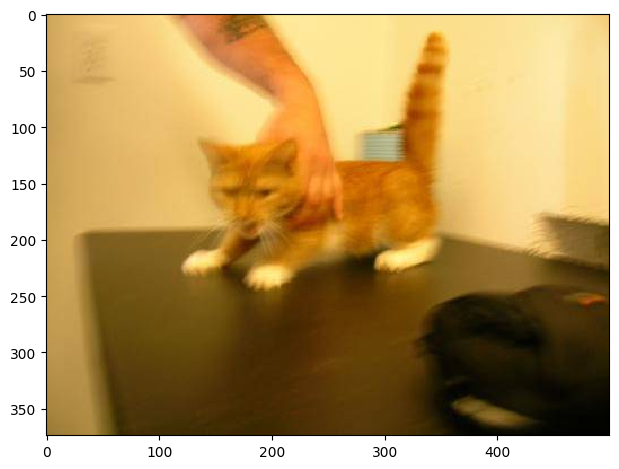

In [78]:
#1 - a
my_cat = io.imread('cats/cat.0.jpg')
io.imshow(my_cat)
io.show()

In [79]:
#1 - b

cat_tensor = torch.from_numpy(my_cat)
print(cat_tensor.shape)

torch.Size([374, 500, 3])


In [80]:
#1 - c

cat_tensor = torch.movedim(cat_tensor, source=2, destination=0)

## Add an empty first dimension, putting our tensor into the standard format
cat_tensor_final = torch.unsqueeze(cat_tensor, dim=0)

from torch.nn import functional 
cat_resized = functional.interpolate(cat_tensor_final, size = (64, 64))

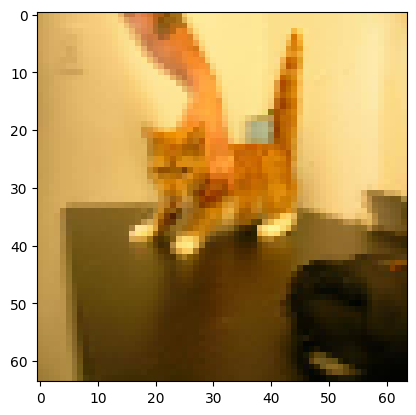

In [81]:
#1 - d

import matplotlib.pyplot as plt
cat_format = torch.movedim(cat_resized[0], source=0, destination=2)
plt.imshow(cat_format)

we think that the resized image is still sufficient enough since the characteristics of cat is still detectable fromthe iamge. 

#2 - 1

There are two hidden layers in this model. There are two weight matrices and two relu functions applied to the dataset. So there are two hidden layers. 

#2 - 2

Tthe first hidden layer of this sequential model expects a vector of shape 784. If we do not flatten the image, the dimension of the parameter of `linear_relu_stack` will not match the model. 

#2 - 3


the simple neural network created below is intended to work on the Fashion MNIST data, which consists of 28x28 pixel grayscale images of 10 different types. therefore, we want the network's forward method to produce a 10-dimensional output.

#3


weight = $784\times 512 + 512\times 512 + 512 \times 10$ 



bias = $512 + 512 + 10$



In [100]:
#4 - 1
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

path = './cats/'
for item in os.listdir(path):
    if item == '.DS_Store':
        continue
    if os.path.isfile(path+item):
        im = Image.open(path+item)
        f, e = os.path.splitext(path+item)
        imResize = im.resize((64,64), Image.Resampling.LANCZOS)
        imResize.save(path + 'new/' + item, 'JPEG')

In [101]:
path = './cats/new/'
img_names = os.listdir(path)

# img_names.remove('.DS_Store')
images = np.empty(shape = (150, 64, 64, 3))
for idx, name in enumerate(img_names):
    img_name = path + name
    # Use you favourite library to load the image
    image = plt.imread(img_name)
    images[idx] = image
    
images = torch.from_numpy(images)
images = torch.movedim(images, source = 3, destination = 1)

In [102]:
classes = [1,0] 

## Repeat an appropriate number of times (print to check)
labels = np.repeat(classes, [50, 100], axis=0)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
images.shape

torch.Size([150, 3, 64, 64])

In [104]:
# Question 4a

## Train-test split
from sklearn.model_selection import train_test_split
train_X_image, test_X_image, train_y_image, test_y_image = train_test_split(images, labels, test_size=0.25)

In [112]:
#4 - b

from torch import nn

class image_net(nn.Module):
    
    ## Constructor commands
    def __init__(self):
        super(image_net, self).__init__()

        self.flatten = nn.Flatten()
        
        ## Apply the following layers sequentially
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(64 * 64 * 3, 1200),
            # nn.ReLU(),
            nn.Linear(1200, 512),
            # nn.ReLU(),
            nn.Linear(512, 2),
        )
    
    ## Function to generate predictions
    def forward(self, x):
        
        ## First it flattens x (note the capitalization, this is flatten() as defined above)
        x = self.flatten(x)
        
        ## Then it applies "linear_relu_stack()" (defined above)
        scores = self.linear_relu_stack(x)
        
        return scores

In [118]:
#4-c

## Hyperparms
epochs = 100
lrate = 0.01
bsize = 100

## For reproduction purposes 
torch.manual_seed(3)

from torch.utils.data import DataLoader, TensorDataset
train_tensor_image_y = torch.Tensor(train_y_image)
train_image_loader = DataLoader(TensorDataset(train_X_image.type(torch.FloatTensor), 
                                        train_tensor_image_y.type(torch.LongTensor)), batch_size=bsize)

test_tensor_image_y = torch.Tensor(test_y_image)
test_image_loader = DataLoader(TensorDataset(test_X_image.type(torch.FloatTensor), 
                                        test_tensor_image_y.type(torch.LongTensor)), batch_size=bsize)

In [121]:
# 4-d

## Cost Function (cross entropy loss since the outcome is categorical)
cost_fn = nn.CrossEntropyLoss()

## Initialize the model
image_net_obj = image_net()

## Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(image_net_obj.parameters(), lr=lrate)

## Initial values for cost tracking
track_cost = np.zeros(epochs)
cur_cost = 0.0

## Loop through the data
for epoch in range(epochs):
    
    cur_cost = 0.0
    correct = 0.0
    
    ## train_loader is iterable and numbers knows the batch
    for i, data in enumerate(train_image_loader, 0):
        
        ## The input tensor and labels tensor for the current batch
        
        inputs, labels = data
        print(inputs)
        ## Clear the gradient from the previous batch
        optimizer.zero_grad()
        
        ## Provide the input tensor into the network to get outputs
        outputs = image_net_obj(inputs)

        ## Calculate the cost for the current batch
        cost = cost_fn(nn.Softmax(dim = 1)(outputs), labels)
        
        ## Calculate the gradient
        cost.backward()
        
        ## Update the model parameters using the gradient
        optimizer.step()
        
        ## Track the current cost (accumulating across batches)
        cur_cost += cost.item()
    
    ## Store the accumulated cost at each epoch
    track_cost[epoch] = cur_cost
    # print(f"Epoch: {epoch} Cost: {cur_cost}") ## Uncomment this if you want printed updates

tensor([[[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

         [[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

         [[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...

RuntimeError: mat1 and mat2 shapes cannot be multiplied (19200x64 and 12288x1200)

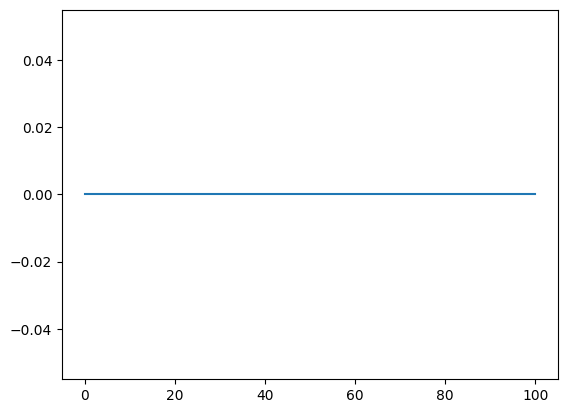

In [120]:
plt.plot(np.linspace(0, epochs, epochs), track_cost)
plt.show()

In [99]:
## Initialize objects for counting correct/total 
correct = 0
total = 0

# Specify no changes to the gradient in the subsequent steps (since we're not using these data for training)
with torch.no_grad():
    for data in test_image_loader:
        # Current batch of data
        images, labels = data
        
        # pass each batch into the network
        outputs = image_net_obj(images)
        
        # the class with the maximum score is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        
        # add size of the current batch
        total += labels.size(0)
        
        # add the number of correct predictions in the current batch
        correct += (predicted == labels).sum().item()

## Calculate and print the proportion correct
print(correct/total)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [92]:
test_predicted = np.argmax(outputs.detach().numpy(), axis = 1)
test_actual = test_tensor_image_y.numpy()
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_actual, test_predicted)
print(f'test accuracy is {accuracy}')


test accuracy is 1.0
